<a href="https://colab.research.google.com/github/MdSami786/GRIP-INTERN-TASKS/blob/main/GRIP_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The Sparks Foundation**

Graduate Rotational Internship Program (GRIP) JUNE 2021 Batch
Data Science & Business Analytics

Task- 3 Perform 'Exploratory Data Analysis' on dataset 'Sample Superstore'

### **Author: SHAIK MOHAMMED SAMIULLAH**


This task is about Exploratory Data Analysis- Retail to find out weak areas where he can work to make more profit.

## **Importing and reading the dataset**

In [1]:
# Importing all libraries required in this notebook
import numpy as np #For numerical operations
import pandas as pd #For handling the dataset
import matplotlib.pyplot as plt #For visualization
import seaborn as sns
import os
%matplotlib inline

In [33]:
# Loading and Reading the iris dataset 
# Data available at the link - 'https://bit.ly/3i4rbWl'

df = pd.read_csv("SampleSuperstore.csv")
print('Data import successfull')

Data import successfull


**Exploring Data**

In [34]:
print(df.head())

        Ship Mode    Segment        Country  ... Quantity Discount    Profit
0    Second Class   Consumer  United States  ...        2     0.00   41.9136
1    Second Class   Consumer  United States  ...        3     0.00  219.5820
2    Second Class  Corporate  United States  ...        2     0.00    6.8714
3  Standard Class   Consumer  United States  ...        5     0.45 -383.0310
4  Standard Class   Consumer  United States  ...        2     0.20    2.5164

[5 rows x 13 columns]


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [36]:
df.duplicated().sum()

17

In [39]:
df.drop_duplicates(inplace=True)
print("Droped duplicate values")

Droped duplicate values


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


Dataset consists of 13 features and each feature consists of 9994 samples.

In [43]:
print("Checking null values")
df.isna().sum()

Checking null values


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No null value present in dataset

In [50]:
# Deleting the column
print("Dropping irrlevent column")
col = ['Postal Code']
df1 = df.drop(columns=col,axis=1)

Dropping irrlevent column


In [51]:
df1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


Here the correlation is done only 5 columns because the remaining columns contains non numerical values

**Visualizing the dataset**

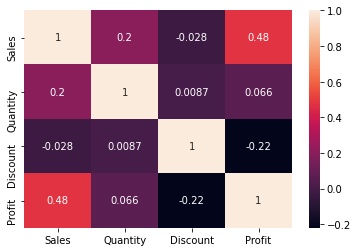

In [52]:
#visualizing the correlation between the features
import seaborn as sns
sns.heatmap(df1.corr(),annot=True)

Here:
1 = storng positive correlation ,
-0.2 = negative correaltion


In [53]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

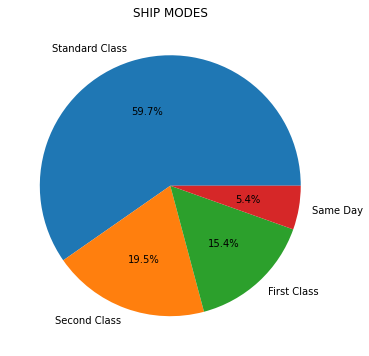

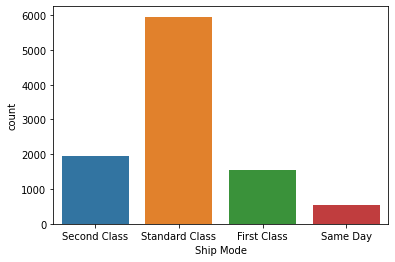

In [54]:
plt.figure(figsize=(6,6))
plt.title('SHIP MODES')
plt.pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].value_counts().index, autopct= '%1.1f%%')
plt.show()
sns.countplot(x=df['Ship Mode'])

Most preferd ship mode is Standard class.

In [55]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

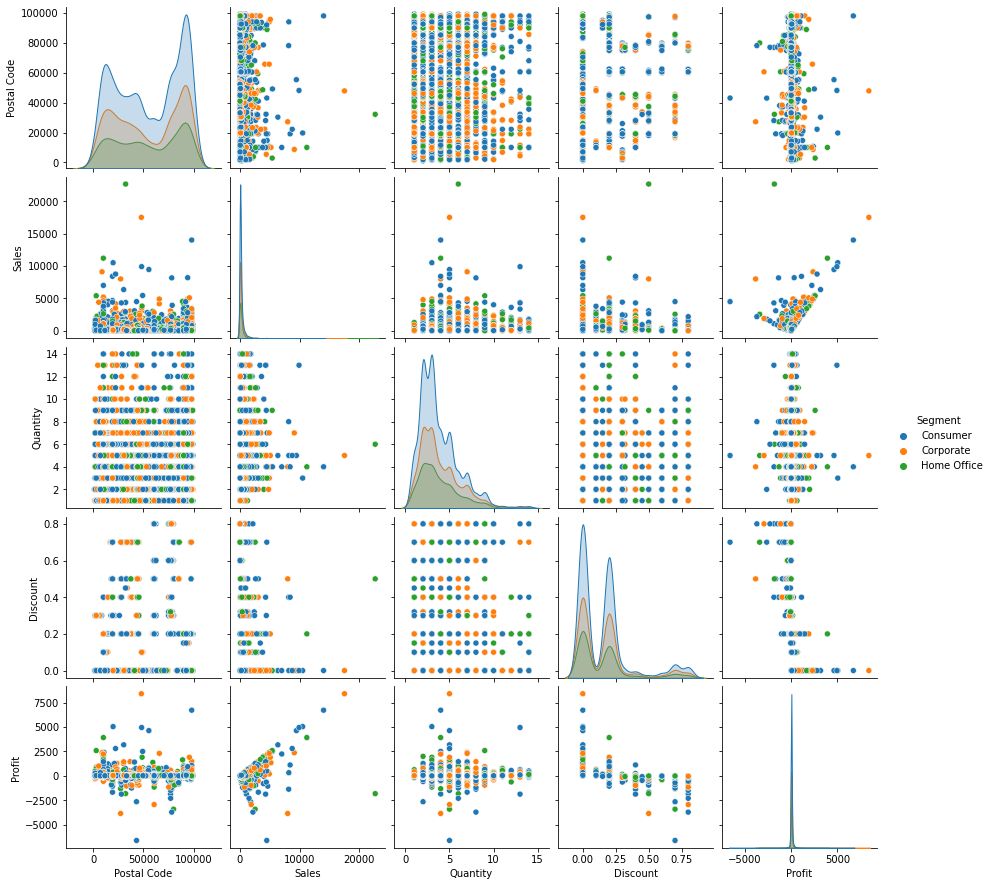

In [56]:
sns.pairplot(df,hue='Segment')

In [57]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

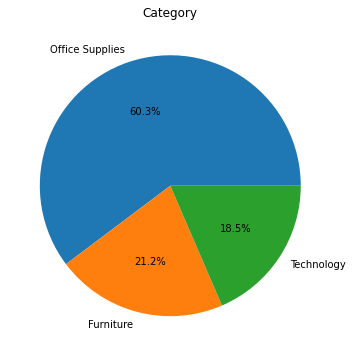

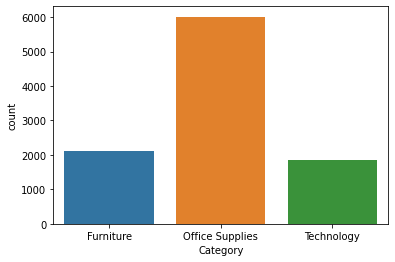

In [58]:
plt.figure(figsize=(6,6))
plt.title('Category')
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.show()
sns.countplot(x='Category',data=df)

Office Supplies Category has highest sales.

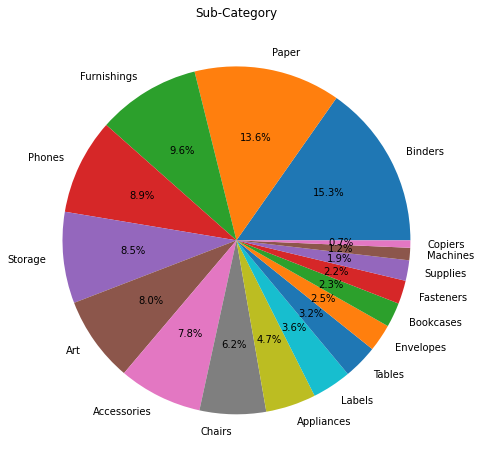

In [62]:
plt.figure(figsize=(8,8))
plt.title('Sub-Category')
plt.pie(df['Sub-Category'].value_counts(),labels=df['Sub-Category'].value_counts().index, autopct='%1.1f%%')
plt.show()

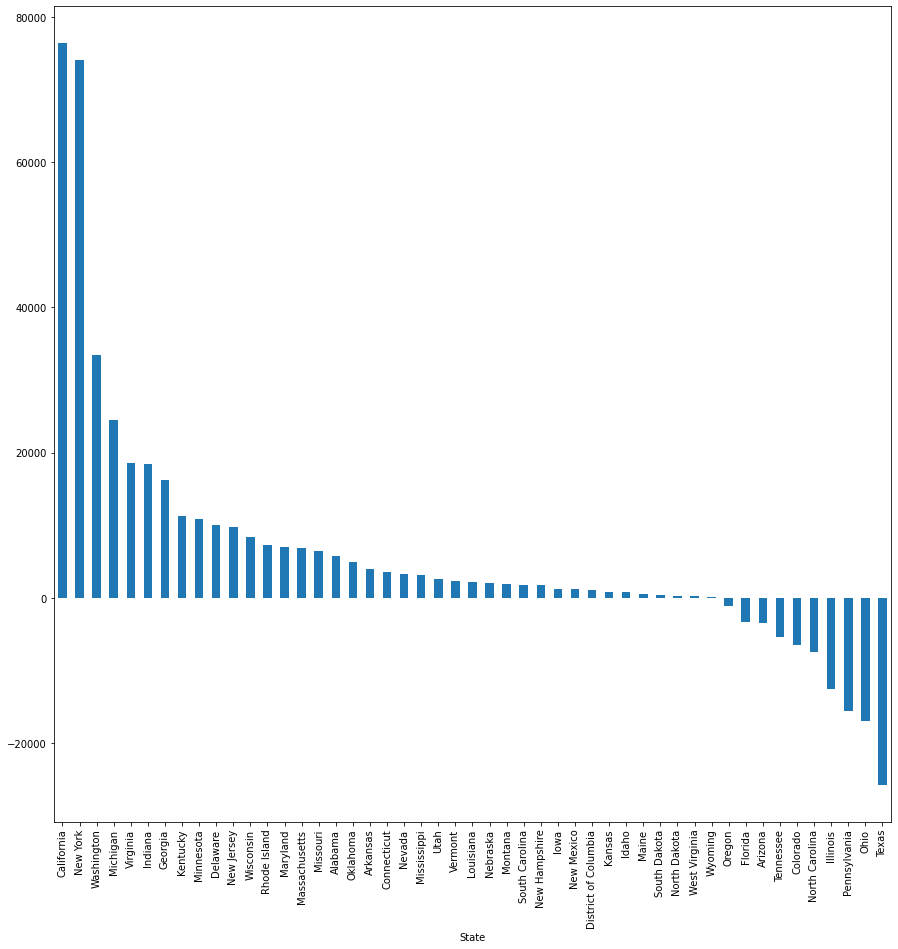

In [63]:
plt.figure(figsize=(15,15))
stpr=df.groupby(['State'])['Profit'].sum().nlargest(50)
stpr.plot.bar()


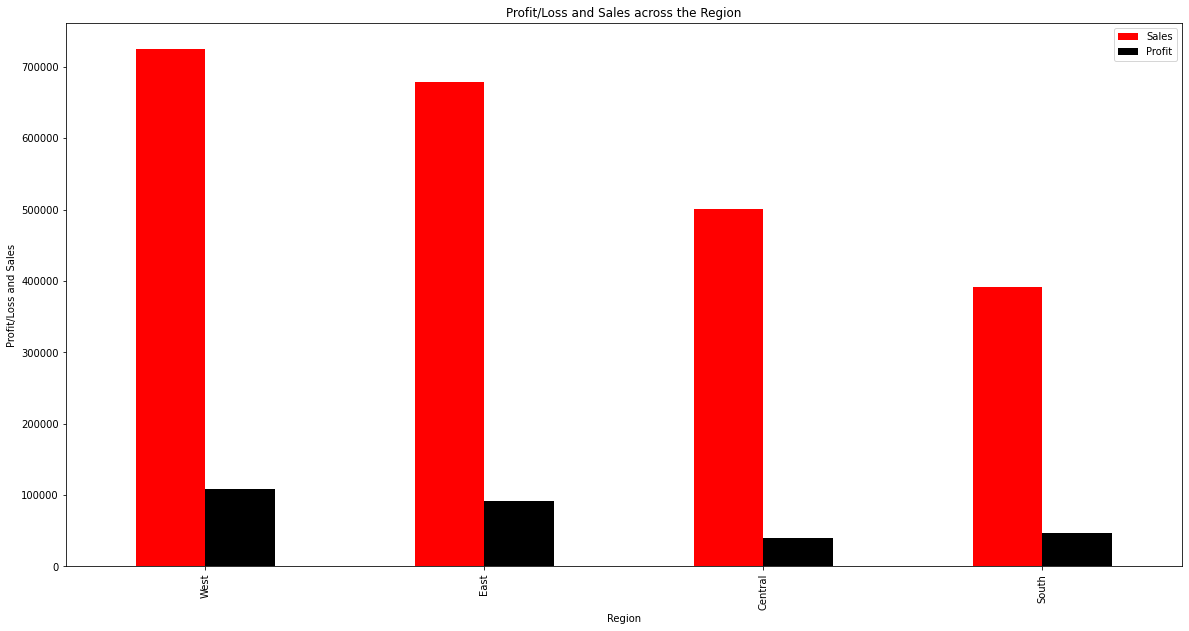

In [65]:
pls=df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the Region')
plt.xlabel('Region')
plt.ylabel('Profit/Loss and Sales')
plt.show()

More the Discount, more the sales but lesser the Profits

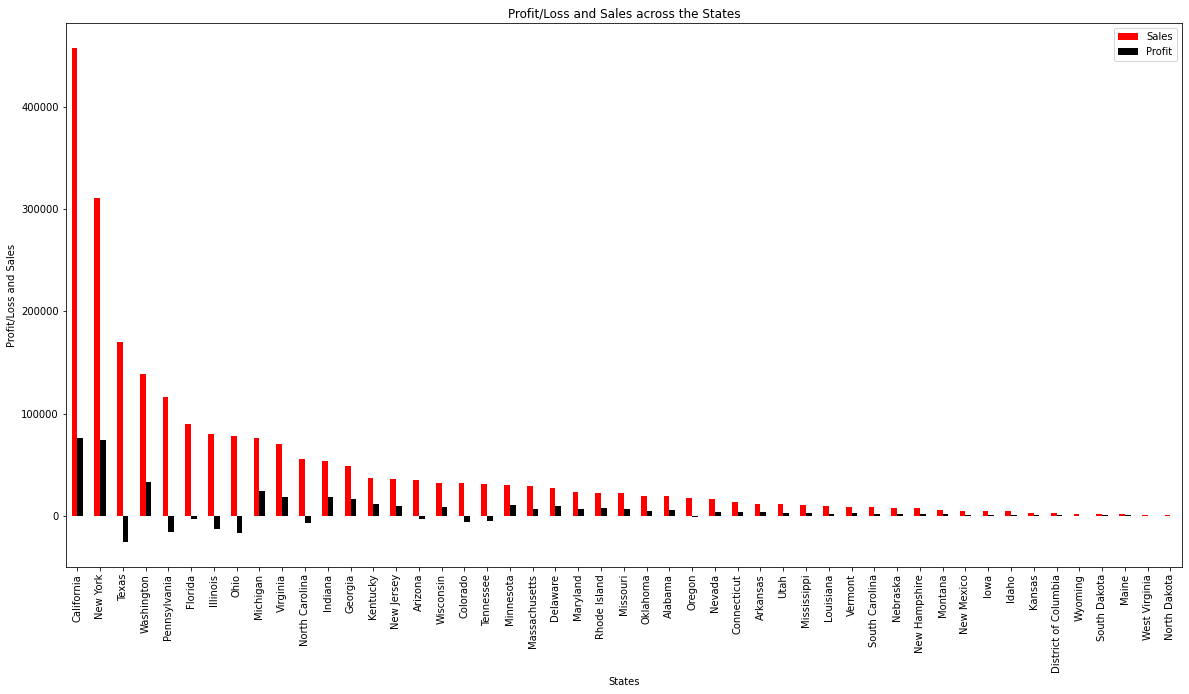

In [66]:
pls=df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the States')
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')
plt.show()

## **Summary**

1. Work more on california and New York as they are places of Maximum sales

2. Decrease Discounts in Southern Region to increase sales

3. Reduce sales of furniture as it has very less profit compared to sales.

4. The Profit generated by office supplies category is more, but the sales for office suppliers are less. So, we have to work on increasing the sales for office supplies category.








## ***Thank you***